# Problem Set 2 - Cooper pair box and single qubit gates

In [10]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import scipy as sc
# Plotting settings:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

plt.rcParams.update({
    'font.size'        : 9, 
    'figure.facecolor' : '0.9',
    'figure.dpi'       : 300,
    'figure.figsize'   : (3.5, 2),
})

## 2.1 Cooper pair box Hamiltonian

### d) CPB Hamiltonian

Define Hamiltonian

In [66]:
def Hamiltonian(r, ng, N):
    """
    CPB Hamiltonian in units of EC
    
    r: ratio EJ/EC
    ng: offset charge (in units of Cooper pairs)
    N: maximum absolute value of charge (in units of Cooper pairs)
    """

    m = np.arange(-N, N+1, 1)
    M = m.shape[0]
    H = np.zeros((M,M))

    for m_index, m_val in enumerate(m):
        m_i = np.zeros(M)
        m_i[m_index] = 1
        m_iplus = np.zeros(M)
        try:
            m_iplus[m_index+1] = 1
        except IndexError:
            m_iplus[m_index] = 0
        mm = np.outer(m_i,m_i)
        mplusm = np.outer(m_iplus,m_i)
        mmplus = np.outer(m_i,m_iplus)

        H += 4*(m_val-ng)**2*mm-0.5*r*(mplusm+mmplus)

    return qt.Qobj(H)

In [67]:
# example
Hamiltonian(1, 0, 4)

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[64.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
 [-0.5 36.  -0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5 16.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  4.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  4.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5 16.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5 36.  -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5 64. ]]

In [68]:
# example of computing eigenvalues and eigenstates
evals, estates = Hamiltonian(1, 0, 4).eigenstates()

Simulation

In [90]:
# For each of the ratios EJ/EC given in r_array and each value of ng, compute the eigenvalues
# corresponding to the first three energy levels and the corresponding eigenstates.
ng_array = np.linspace(-1,1,101)
r_array = np.array([1,5,10,30])
N = 16 # why??

# dictionaries to store eigenvalues
e0 = {}
e1 = {}
e2 = {}
# dictionaries to store eigenstates
es0 = {}
es1 = {}
es2 = {}

for r in r_array:
    e0[r] = []
    e1[r] = []
    e2[r] = []

    es0[r] = []
    es1[r] = []
    es2[r] = []

    for ng in ng_array:
        evals, estates = Hamiltonian(r,ng,N).eigenstates()

        e0[r].append(evals[0])
        e1[r].append(evals[1])
        e2[r].append(evals[2])

        es0[r].append(estates[0])
        es1[r].append(estates[1])
        es2[r].append(estates[2])

Plot energy levels

In [96]:
# Subtract offset (ground state energy at ng=0) and normalize energy by e-state energy at ng=0

# Find index of ng=0
ng0_idx = np.where(ng_array==0)[0][0]

# dictionaries to store normalized eigenvalues
e0_norm = {}
e1_norm = {}
e2_norm = {}

for r in r_array:
    # subtract offset energy such that ground state energy is zero for zero offset charge
    e0_norm[r] = e0[r] - e0[r][ng0_idx] 
    e1_norm[r] = e1[r] - e0[r][ng0_idx] 
    e2_norm[r] = e2[r] - e0[r][ng0_idx] 
    
    #normalize energies to excited state energy for zero offset charge
    e_ref = e1_norm[r][ng0_idx]
    e0_norm[r] = e0_norm[r]/e_ref
    e1_norm[r] = e1_norm[r]/e_ref
    e2_norm[r] = e2_norm[r]/e_ref



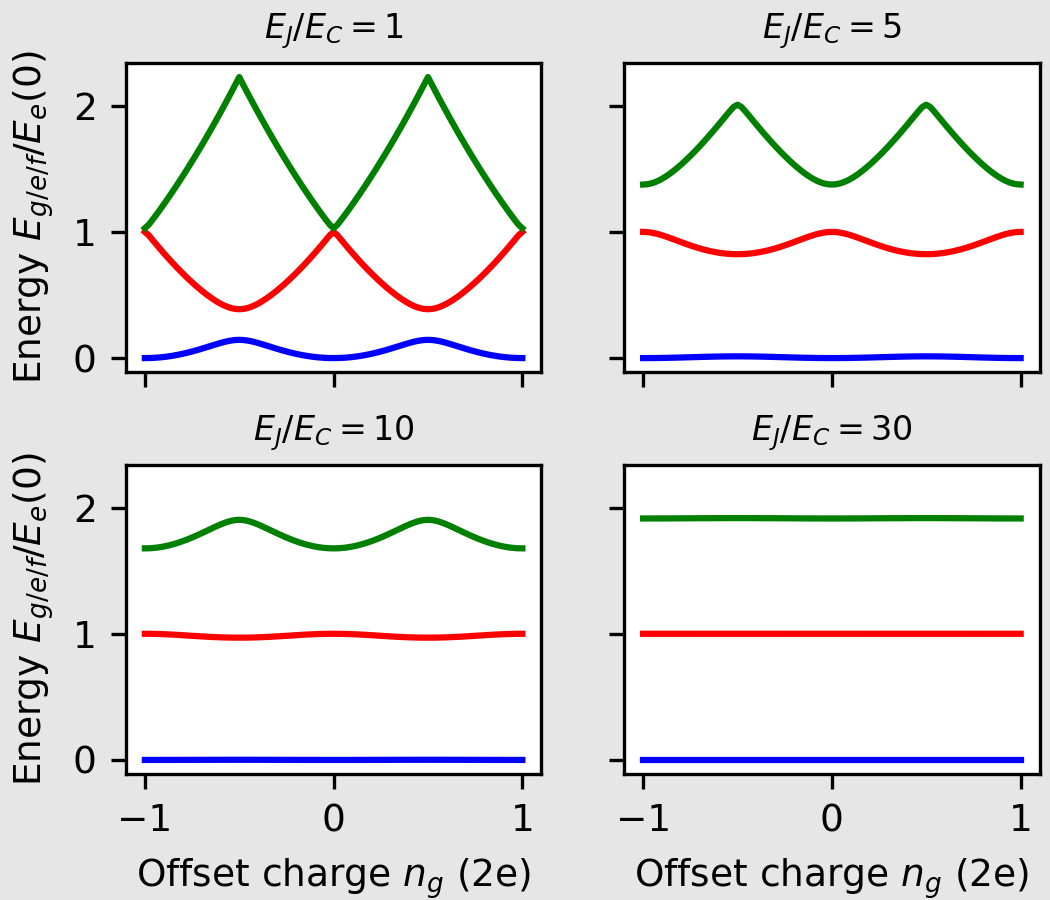

In [97]:
# Plot energy levels
fig, axs = plt.subplots(figsize=(3.5,3), nrows=2, ncols=2, sharex=True, sharey=True)
fig.subplots_adjust(0.12,0.14,0.99,0.93, hspace=0.3)
axs = axs.flatten()

for i, r in enumerate(r_array):
    axs[i].plot(ng_array, e0_norm[r], 'b')
    axs[i].plot(ng_array, e1_norm[r], 'r')
    axs[i].plot(ng_array, e2_norm[r], 'g')
    axs[i].set_title(rf'$E_J/E_C = {r}$', fontsize=8)

# add xlabels and ylabels
axs[2].set_xlabel(r'Offset charge $n_g$ (2e)') 
axs[3].set_xlabel(r'Offset charge $n_g$ (2e)') 
axs[0].set_ylabel(r'Energy $E_{g/e/f}/E_e(0)$') 
axs[2].set_ylabel(r'Energy $E_{g/e/f}/E_e(0)$') 

fig.savefig('CPB_energy_levels.pdf')
plt.show()



Plot probabilities

In [98]:
# To verify that the Hilbert space was truncated to a sufficiently large dimension,
# we check that the values at the boundaries are negligible (which is the case, e.g., for N=16).
es1[30][ng0_idx].full().flatten()

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  2.60445744e-12+0.j,  1.01360328e-10+0.j,
        3.32268564e-09+0.j,  9.02976955e-08+0.j,  1.99586436e-06+0.j,
        3.50501339e-05+0.j,  4.74918098e-04+0.j,  4.78059870e-03+0.j,
        3.39770550e-02+0.j,  1.58534299e-01+0.j,  4.32106882e-01+0.j,
        5.35698607e-01+0.j,  0.00000000e+00+0.j, -5.35698607e-01+0.j,
       -4.32106882e-01+0.j, -1.58534299e-01+0.j, -3.39770550e-02+0.j,
       -4.78059870e-03+0.j, -4.74918098e-04+0.j, -3.50501339e-05+0.j,
       -1.99586436e-06+0.j, -9.02976955e-08+0.j, -3.32268564e-09+0.j,
       -1.01360328e-10+0.j, -2.60445744e-12+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

In [105]:
# compute density matrices and the probabilities of being in a particular charge state (for ground state and excited state)
ng0_idx = len(ng_array)//2  # index corresponding to ng=0
rho_g = {} # density matrix for ground state
rho_e = {} # density matrix for excited state
prob_g = {} # probabilities for ground state
prob_e = {} # probabilities for excited state
for r in r_array:
    rho_g[r] = np.outer(es0[r][ng0_idx], es0[r][ng0_idx]) 
    rho_e[r] = np.outer(es1[r][ng0_idx], es1[r][ng0_idx])

    prob_g[r] = np.diag(rho_g[r])
    prob_e[r] = np.diag(rho_e[r])


/mnt/c/ETH/QIPII/qutip_exploration/qutip/lib/python3.8/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/mnt/c/ETH/QIPII/qutip_exploration/qutip/lib/python3.8/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


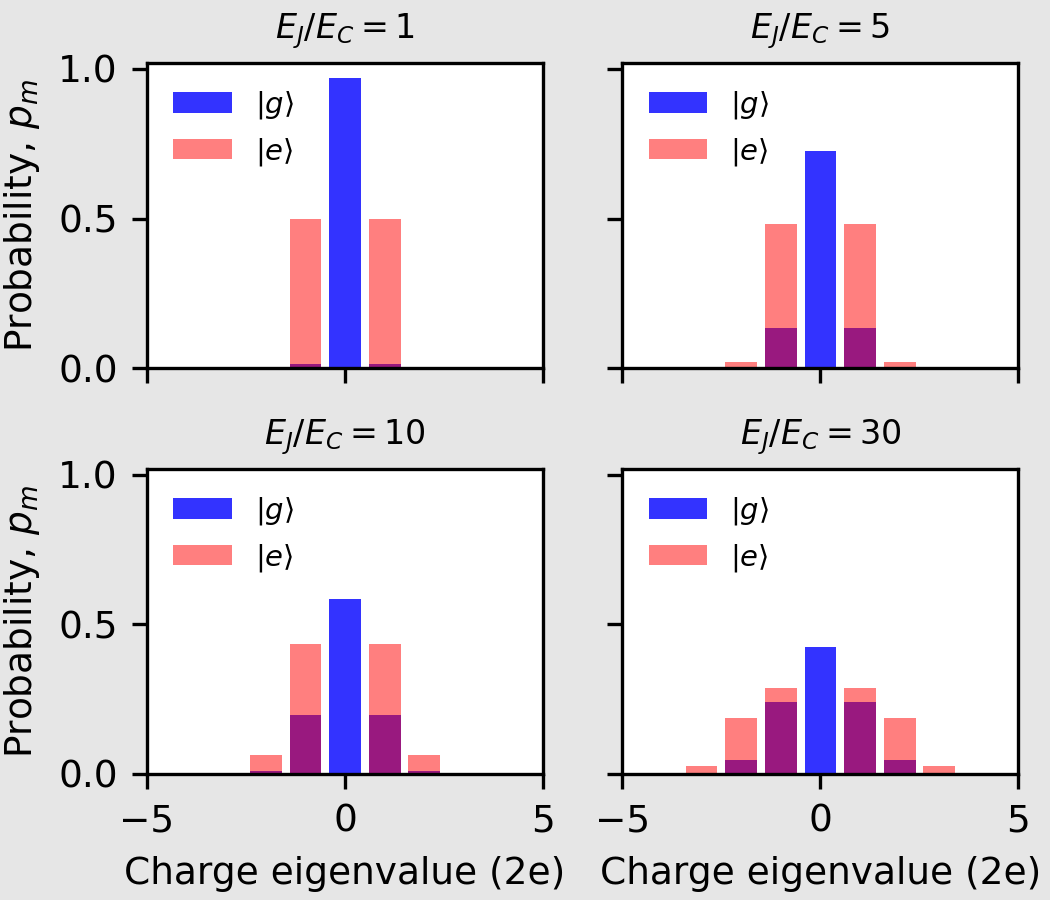

In [106]:
# Plot probabilities
fig, axs = plt.subplots(figsize=(3.5,3), nrows=2, ncols=2, sharex=True, sharey=True)
fig.subplots_adjust(0.14,0.14,0.97,0.93, hspace=0.33)
axs = axs.flatten()

charge_ev = np.arange(-N,N+1,1)  # charge eigenvalues
for i, r in enumerate(r_array):
    # using alpha for transparency makes it possible to see both bar plots overlayed
    axs[i].bar(charge_ev, prob_g[r], color='b', alpha=0.8, label=r'$|g\rangle$')
    axs[i].bar(charge_ev, prob_e[r], color='r', alpha=0.5, label=r'$|e\rangle$')
    axs[i].set_title(rf'$E_J/E_C = {r}$', fontsize=8)

# add xlabels and ylabels
axs[2].set_xlabel(r'Charge eigenvalue (2e)') 
axs[3].set_xlabel(r'Charge eigenvalue (2e)') 
axs[0].set_ylabel(r'Probability, $p_m$') 
axs[2].set_ylabel(r'Probability, $p_m$')

for ax in axs:
    ax.set_xlim(-5,5)
    ax.legend(loc='upper left', frameon=False, ncol=1, fontsize=7)

fig.savefig('CPB_probabilities.pdf')
plt.show()



### e) Plot charge dispersion

In [111]:
ng_half_idx = np.where(ng_array==0.5)[0][0]  # index corresponding to ng=1/2
print(ng_half_idx)
epsilon = []
for r in r_array:
    # for each ratio, calculate the difference between the ge transition frequencies at ng=0 and ng=1/2
    epsilon.append((e1_norm[r][ng0_idx]-e0_norm[r][ng0_idx])-(e1_norm[r][ng_half_idx]-e0_norm[r][ng_half_idx]))

75


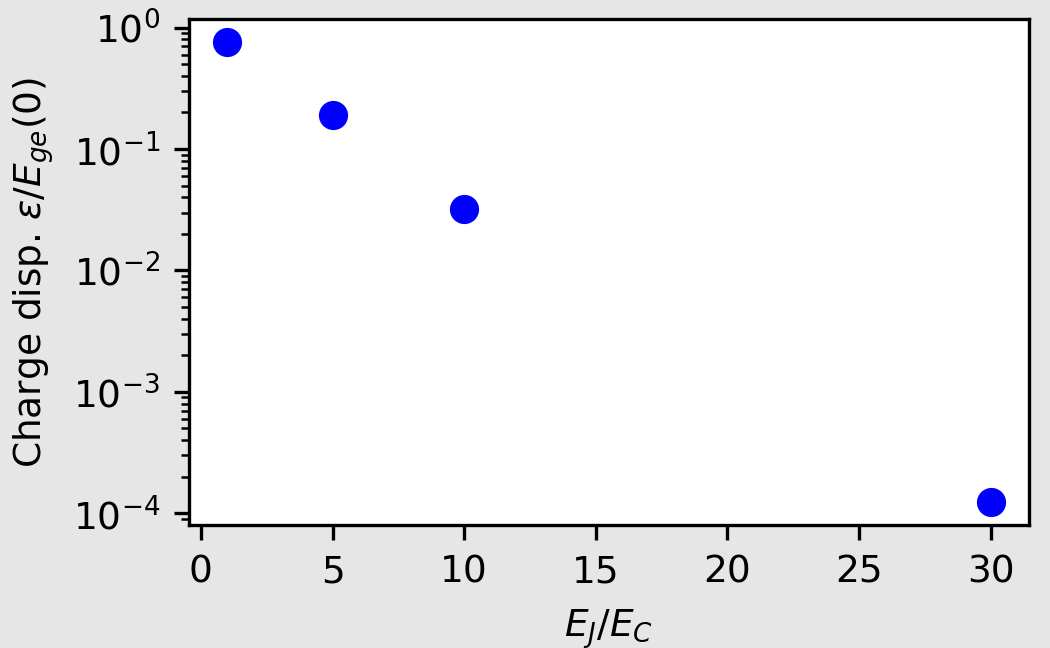

In [112]:
# Plot charge dispersion (normalized by E_ge at ng=0)
fig, ax = plt.subplots(figsize=(3.5,3.5/1.62))
fig.subplots_adjust(0.18,0.19,0.98,0.97, hspace=0.33)
ax.set_yscale('log')

# plot epsilon over the ratio EJ/EC
ax.plot(r_array, epsilon, "ob")

# add xlabel and ylabel
ax.set_xlabel(r'$E_J/E_C$') 
ax.set_ylabel(r'Charge disp. $\epsilon/E_{ge}(0)$')

fig.savefig('CPB_charge_disp.pdf')
plt.show()

## 2.2 Single qubit gates and anharmonicity

### b) Square pulse with $\Omega_0/2\pi= 0.04$ GHz

Define system Hamiltonian

In [113]:
alpha=0.3*2*np.pi
energy_levels=3
a=qt.destroy(energy_levels)
adag=a.dag()

H=adag*adag*a*a*alpha/2

Define drive Hamiltonian square pulse

In [114]:
def H1_coeff(t, args):
    omega=args['omega_0']
    tau=args['tau']
    if t<0:
        return 0
    elif (0<t<tau):
        return omega/2
    else:
        return 0

Complete Hamiltonian

In [115]:
Htot=[H,[a+adag,H1_coeff]]

Definitions

In [116]:
omega_0= 0.04*2*np.pi
t = np.linspace(-1, 15, 2000)
ground = qt.basis(energy_levels, 0)
excited = qt.basis(energy_levels, 1)
sec_excited = qt.basis(energy_levels, 2)
sigma_gg = ground * ground.dag()   # |g><g|
sigma_ee = excited * excited.dag() # |e><e|
sigma_ff = sec_excited * sec_excited.dag() # |f><f|

Master equation simulation

In [118]:
output = qt.mesolve(Htot, ground, t, [], [sigma_gg,sigma_ee,sigma_ff],args={'omega_0':omega_0,'tau':np.pi/omega_0})

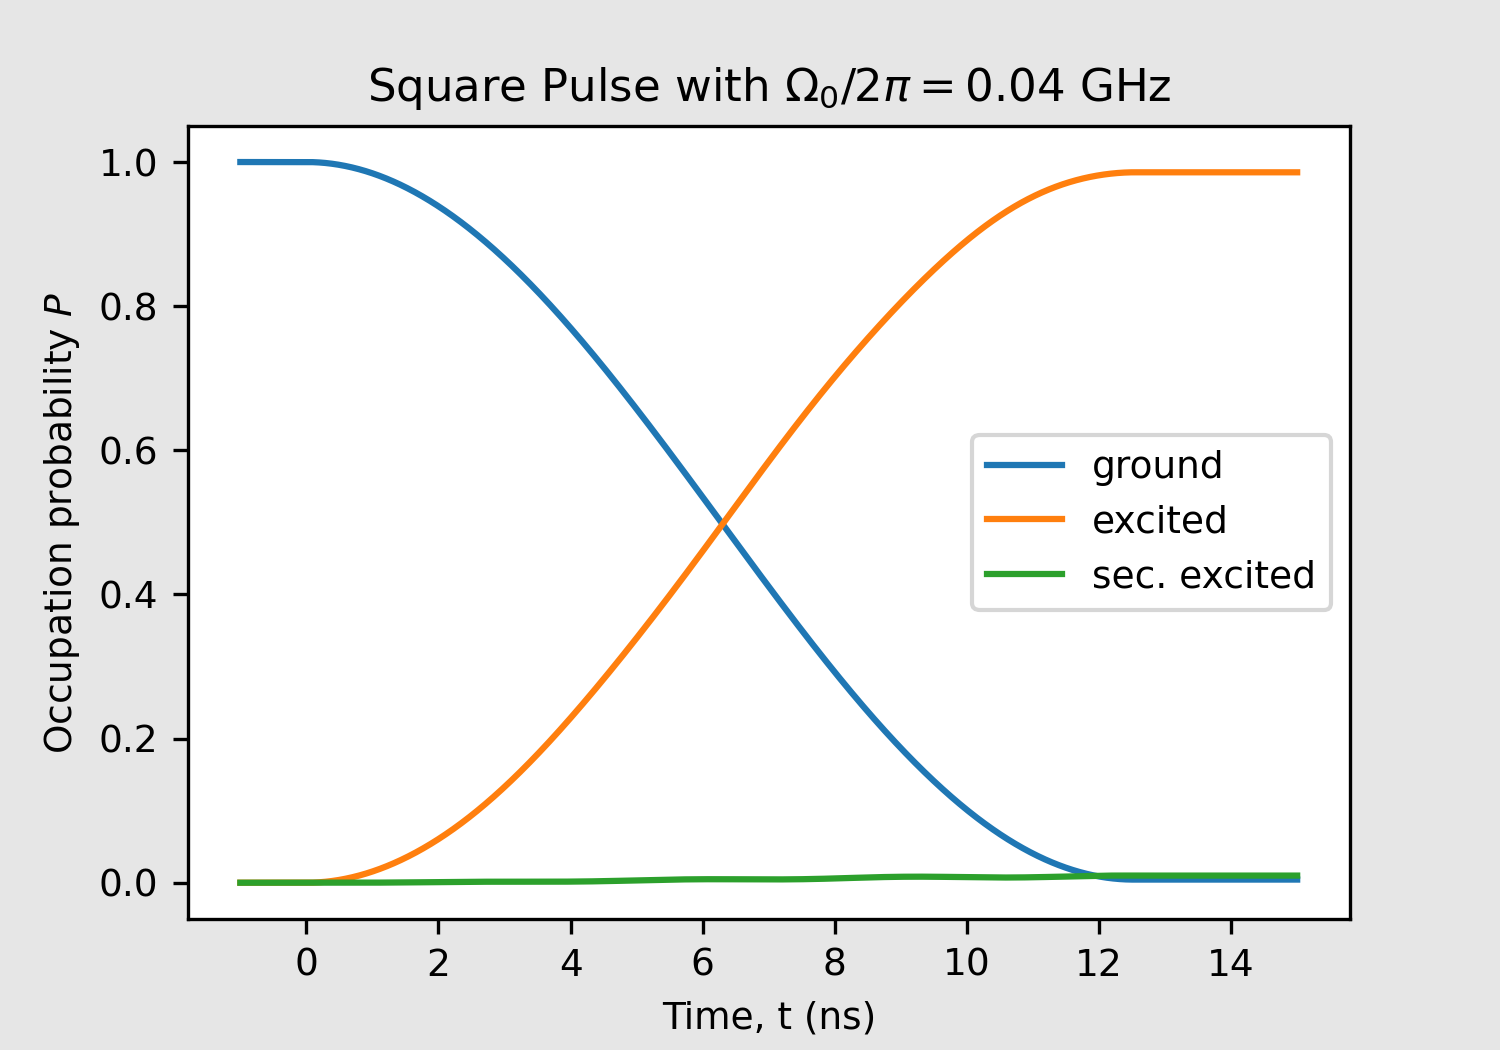

In [119]:
#Plot results
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(t, output.expect[0], label="ground")
ax.plot(t, output.expect[1], label="excited")
ax.plot(t, output.expect[2], label="sec. excited")
ax.legend()
ax.set_xlabel('Time, t (ns)')
ax.set_ylabel('Occupation probability $P$')
ax.set_title('Square Pulse with $\Omega_0/2 \pi= 0.04$ GHz');

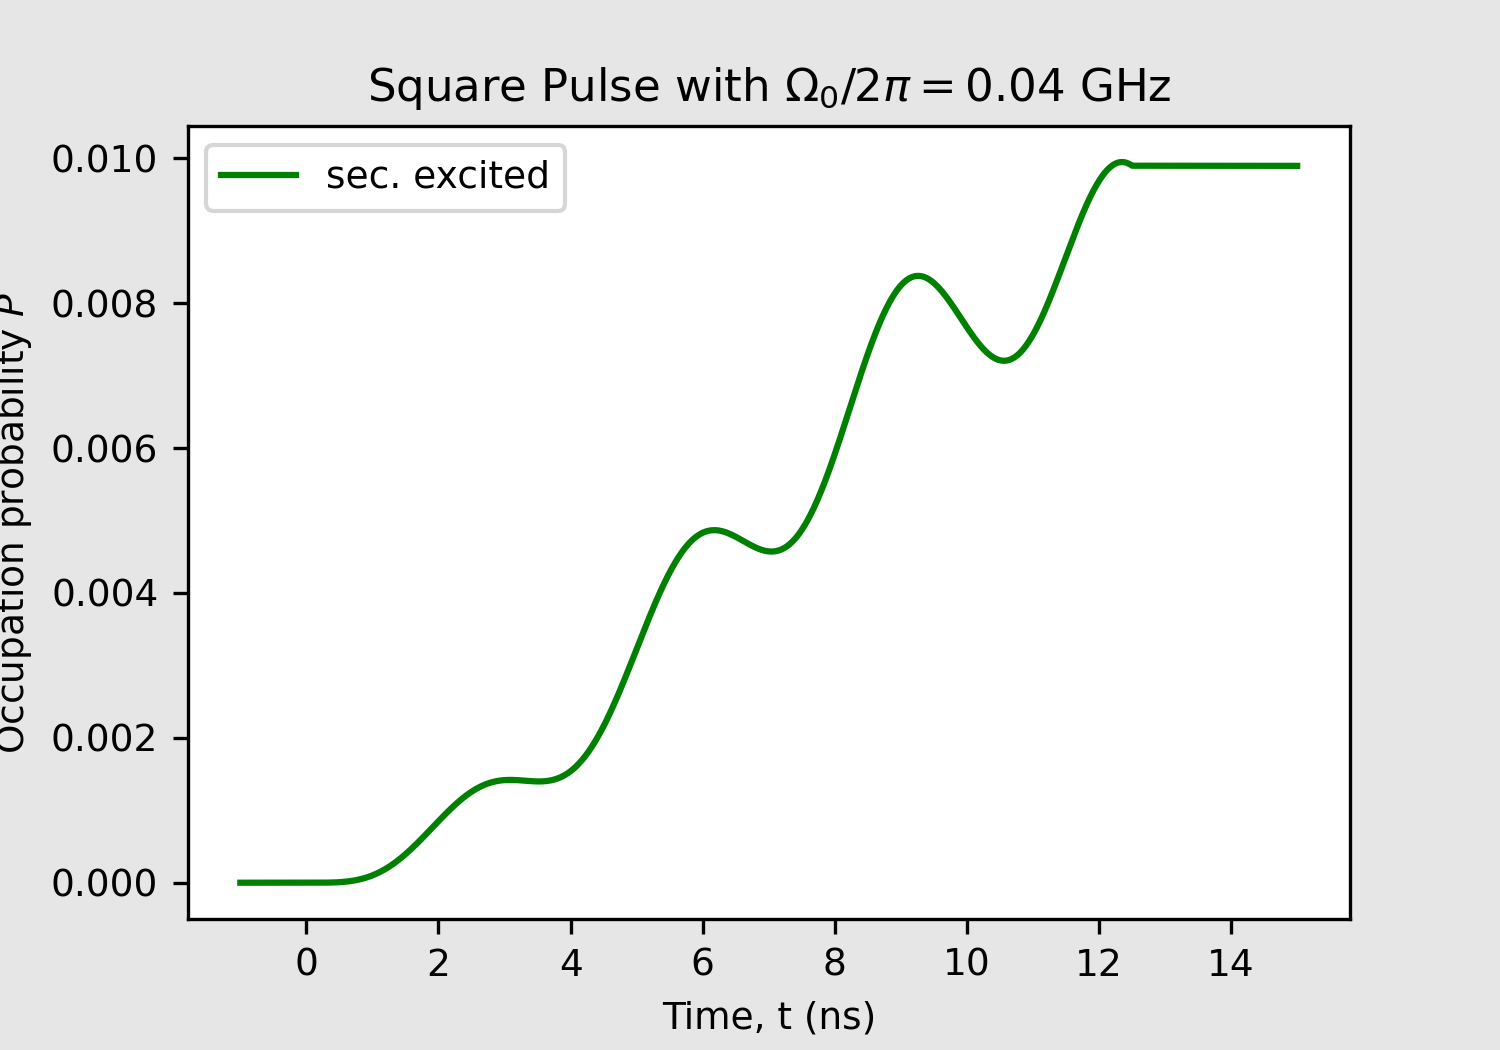

In [124]:
#Plot f-level only
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(t, output.expect[2], label="sec. excited", color='green')
ax.legend()
ax.set_xlabel('Time, t (ns)')
ax.set_ylabel('Occupation probability $P$')
ax.set_title('Square Pulse with $\Omega_0/2 \pi= 0.04$ GHz');

Solve for state after pulse

In [122]:
outputstates = qt.mesolve(Htot, ground, t, [], [],args={'omega_0':omega_0,'tau':np.pi/(omega_0)})

In [128]:
#Final state
np.abs(outputstates.states[-1][1])**2

array([[0.98574851]])

### c) Second excited state population for different drive amplitude

#### Square pulses

Define pulse lengths and the corresponding drive amplitudes

In [129]:
taulist = np.linspace(5., 50., 10)
Omega0list= np.pi/taulist

Get second excited state populations for each drive amplitude

In [131]:
sec_exc_state_poplist=[]
for Omega0, tau in zip(Omega0list, taulist):
    t = np.linspace(0, tau, 2000)
    #simulate dynamics with master equation
    outputstates = qt.mesolve(Htot, ground, t, [], [],args={'omega_0':Omega0,'tau':tau})
    #get 2nd excited state
    sec_exc_state_pop=np.abs(outputstates.states[-1][2])**2
    sec_exc_state_poplist.append(sec_exc_state_pop[0,0])

In [132]:
sec_exc_state_poplist

[0.0630204760571239,
 0.012852538969982936,
 0.006306078052279199,
 0.0034049377934306665,
 0.0022397578703622846,
 0.0015299339480333478,
 0.0011382819420123424,
 0.0008639100952997186,
 0.0006874589195455837,
 0.0005539013738660739]

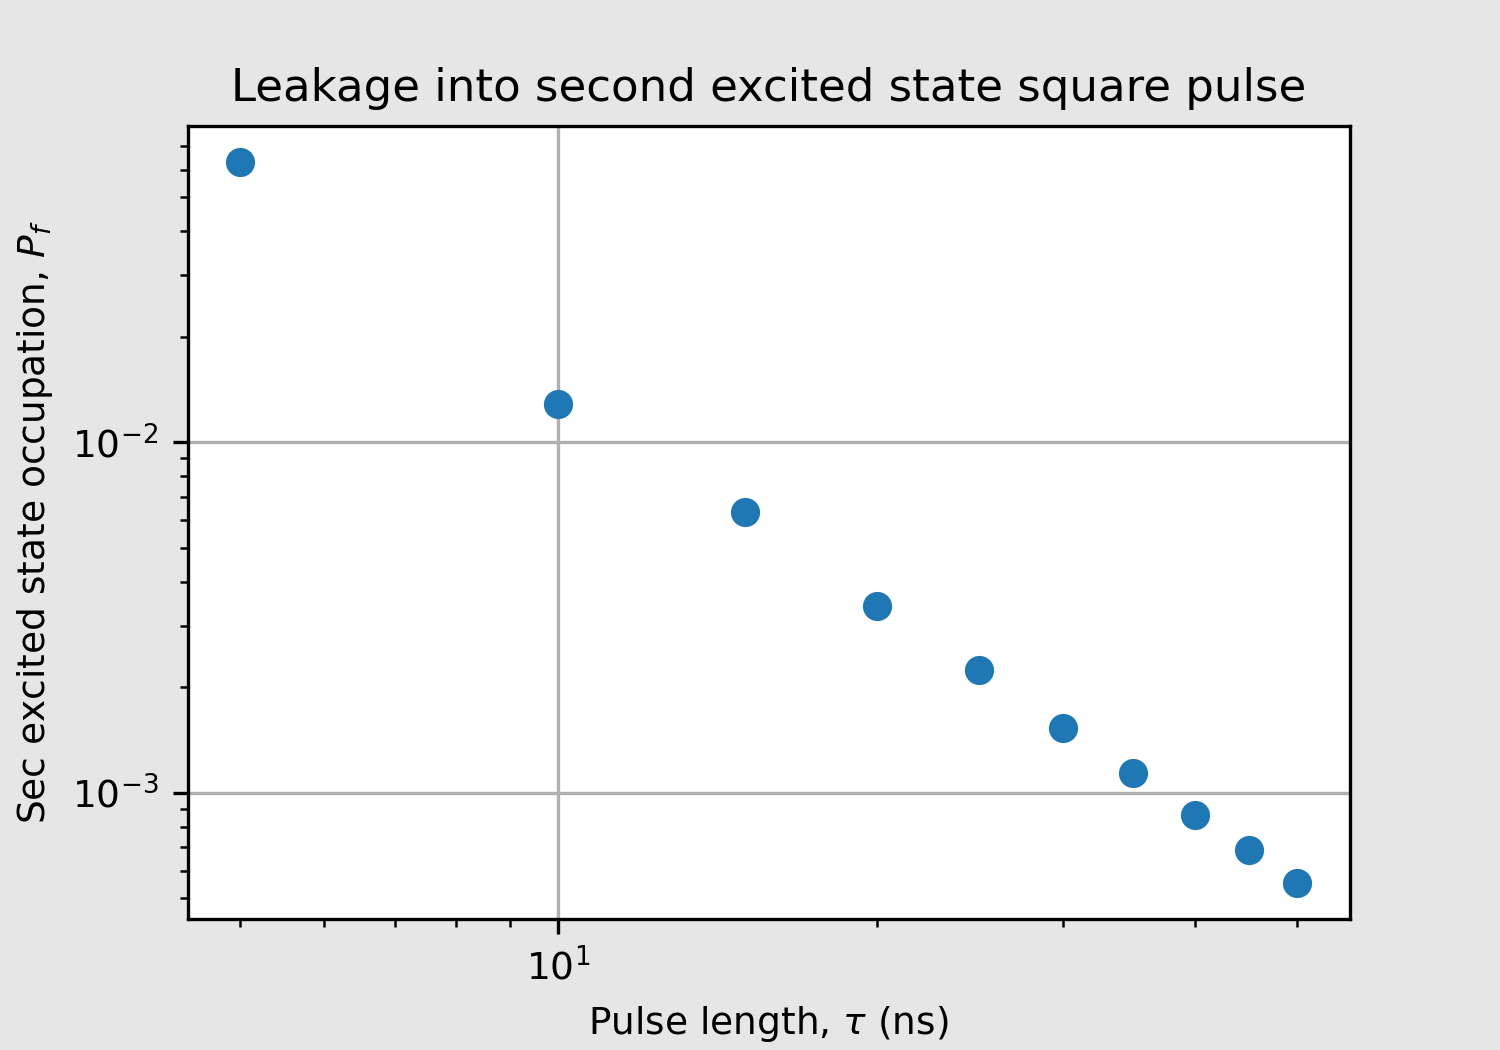

In [133]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.loglog(taulist, sec_exc_state_poplist,'o')
ax.set_xlabel('Pulse length, $\\tau$ (ns)')
ax.set_ylabel('Sec excited state occupation, $P_f$')
ax.set_title('Leakage into second excited state square pulse');
ax.grid()

#### Gaussian pulses

Define pulse lengths

In [134]:
taulist2 = np.linspace(5., 50., 10)

Define Gaussian pulse shape

In [135]:
def gaussian_coeff(t, args):
    omegag=args['omega_g']
    tau=args['tau']
    sigma=args['sigma']
    if t<0:
        return 0
    elif (0<t<tau):
        return omegag*np.exp(-(t-tau/2)**2/(2*sigma**2))
    else:
        return 0

In [136]:
HtotGauss = [H,[(a+adag)/2,gaussian_coeff]]

Get second excited state populations for each drive amplitude

In [ ]:
sec_exc_state_poplist2=[]
for tau in taulist2:
    t = np.linspace(0, tau, 2000)
    # Gaussian arguments (setting the amplitude to 1 means we now have only the exp(...) term)
    args_gauss = {'omega_g':1.0,'tau':tau,'sigma':tau/4}
    # calculate amplitude
    integral = quad(?????)[0]
    # set the correct gaussian amplitude
    args_gauss['omega_g'] = ??????
    #simulate dynamics with master equation
    outputstates = qt.mesolve(HtotGauss, ground, t, [], [],args=args_gauss)
    #get 2nd excited state
    outputstates = ?????
    #get 2nd excited state
    .........
    sec_exc_state_poplist2.append(.......)

In [ ]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.loglog(taulist2, sec_exc_state_poplist2,'o')
ax.set_xlabel('Pulse length, $\\tau_1$ (ns)')
ax.set_ylabel('Sec excited state occupation, $P_f$')
ax.set_title('Leakage into second excited state Gaussian');
ax.grid()

#### Plot together

In [ ]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.loglog(taulist, sec_exc_state_poplist,'o', label = 'Square pulse')
ax.loglog(taulist2, sec_exc_state_poplist2,'o', label = 'Gaussian pulse')
ax.set_xlabel('Pulse length, $\\tau_1$ (ns)')
ax.set_ylabel('Sec excited state occupation, $P_f$')
ax.set_title('Leakage into second excited state')
ax.legend()
ax.grid()

### d) Pulse Fourier transform

Plot pulse and fourier transform

In [ ]:
taulist = np.linspace(5., 50., 10)

In [ ]:
pulse_amp_list=[]
for tau in taulist:
    t = np.linspace(????????, 2000)
    pulse_amp=[]
    for t0 in t:
        pulse_amp.append(H1_coeff(t0,{'omega_0':?????,'tau':tau})/(2*np.pi))
    pulse_amp_list.append(pulse_amp)

In [ ]:
#Plot pulses
fig, ax = plt.subplots(figsize=(5,3.5))
i=0
for tau in taulist:
    t = np.linspace(???????????, 2000)
    ax.plot(t, pulse_amp_list[i], label="$\\tau= %.0f$ ns"%tau)
    i=i+1
ax.legend()
ax.set_xlabel('Time, t (ns)')
ax.set_ylabel('Amplitude, $\Omega/2 \pi$ (GHz)')
ax.set_title('Square pulse shape');

In [ ]:
#Longer time window for finer frequency spectrum
pulse_amp_list=[]
for tau in taulist:
    t = np.linspace(-20*tau, 20*tau, 2000)
    pulse_amp=[]
    for t0 in t:
        pulse_amp.append(H1_coeff(t0,{'omega_0':??????????,'tau':tau})/(2*np.pi))
    pulse_amp_list.append(pulse_amp)

In [ ]:
#Fourier transform
fig, ax = plt.subplots(figsize=(5,3.5))
i=0
for tau in taulist:
    freq=np.fft.fftfreq(???,d=????)
    ax.plot(freq, np.real(np.fft.fft(??????)), label="$\\tau= %.0f$ ns"%tau)
    i=i+1
ax.legend(loc="right")
ax.set_xlim(-1,1)
#ax.set_ylim(-2,2)
ax.set_xlabel('Frequency, f (GHz)')
ax.set_ylabel('FT of Amplitude, $\hat{A}_0$')
ax.set_title('Frequency spectrum of square pulse');

Plot pulse and fourier transform for Gaussian pulse

In [ ]:
pulse_amp_listGauss=[]
for tau in taulist:
    t = np.linspace(????????, 2000)
    pulse_amp=[]
    # Gaussian arguments
    args_gauss = {'omega_g':1.0,'tau':tau,'sigma':tau/4}
    # calculate amplitude
    integral = quad(?????)[0]
    args_gauss['omega_g'] = ??????????
    for t0 in t:
        pulse_amp.append(gaussian_coeff(t0,args_gauss)/(2*np.pi))
    pulse_amp_listGauss.append(pulse_amp)

In [ ]:
#Plot pulses
fig, ax = plt.subplots(figsize=(5,3.5))
i=0
for tau in taulist:
    t = np.linspace(????????, 2000)
    ax.plot(t, pulse_amp_listGauss[i], label="$\\tau= %.0f$ ns"%tau)
    i=i+1
ax.legend()
ax.set_xlabel('Time, t (ns)')
ax.set_ylabel('Amplitude, $\Omega/2 \pi$ (GHz)')
ax.set_title('Gaussian pulse shape');

In [ ]:
#Longer time window for finer frequency spectrum
pulse_amp_listGauss=[]
for tau in taulist:
    t = np.linspace(-20*tau, 20*tau, 2000)
    pulse_amp=[]
    # Gaussian arguments
    args_gauss = {'omega_g':1.0,'tau':tau,'sigma':tau/4}
    # calculate amplitude
    integral = quad(????????)[0]
    args_gauss['omega_g'] = ????????
    for t0 in t:
        pulse_amp.append(gaussian_coeff(t0,args_gauss)/(2*np.pi))
    pulse_amp_listGauss.append(pulse_amp)

In [ ]:
fig, ax = plt.subplots(figsize=(5,3.5))
i=0
for tau in taulist:
    freq=np.fft.fftfreq(????,d=?????????)
    ax.plot(freq, np.real(np.fft.fft(????????)), label="$\\tau= %.0f$ ns"%tau)
    i=i+1
ax.legend(loc="right")
ax.set_xlim(-0.5,0.5)
#ax.set_ylim(-2,2)
ax.set_xlabel('Frequency, f (GHz)')
ax.set_ylabel('FT of Amplitude, $\hat{A}_0$')
ax.set_title('Frequency spectrum of Gaussian pulses');


Compare square and Gaussian pulses

In [ ]:
fig, ax = plt.subplots(figsize=(5,3.5))
i=6
tau=taulist[i]
freq=np.fft.fftfreq(????,d=???????)
ax.plot(freq, np.real(np.fft.fft(??????)), label="Square")
ax.plot(freq, np.real(np.fft.fft(???????)), label="Gaussian")
ax.legend(loc="right")
ax.set_xlim(-0.5,0.5)
#ax.set_ylim(-2,2)
ax.set_xlabel('Frequency, f (GHz)')
ax.set_ylabel('FT of Amplitude, $\hat{A}_0$')
ax.set_title('Frequency spectrum of pulses with length $\\tau=%.0f$ ns'%tau);
fig.savefig('FreqSpectrumGaussCompare.pdf')

### e) Find optimal linewidth for a pulse length of $\tau=20$ ns

Define linewidths

In [ ]:
sigmalist=np.linspace(????????,40)
tau=20

Extract leakage

In [ ]:
sec_exc_state_poplist2=[]
for sigma in sigmalist:
    t = np.linspace(0, tau, 2000)
    # Gaussian arguments
    args_gauss = {????????????}
    # calculate amplitude
    integral = ??????????
    args_gauss['omega_g'] = ?????????????????
    #simulate dynamics
    outputstates = ??????????????
    #get 2nd excited state
    
    sec_exc_state_poplist2.append(...........)

In [ ]:
#Plot Leakage
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(sigmalist, sec_exc_state_poplist2,'o')
ax.set_xlabel('Linewidth, $\\sigma$ (ns)')
ax.set_ylabel('Sec excited state occupation, $P_f$')
ax.set_title('Leakage into second excited state Gaussian');
ax.set_yscale('log')
ax.grid()

Find linewidth with minimal leakage

In [ ]:
??????